In [ ]:
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d omkargurav/face-mask-dataset

In [4]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [7]:
with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

labels = with_mask_labels + without_mask_labels

In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
without_mask_files = os.listdir('/content/data/without_mask')

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

In [9]:
X = np.array(data)
Y = np.array(labels)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [10]:
import tensorflow as tf
from tensorflow import keras

num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

In [13]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 0s 9ms/step - loss: 0.2104 - acc: 0.9153
Test Accuracy = 0.9152879118919373


Epoch 1/5
170/170 [==============================] - 9s 40ms/step - loss: 0.4590 - acc: 0.8141 - val_loss: 0.2909 - val_acc: 0.8694
Epoch 2/5
170/170 [==============================] - 6s 33ms/step - loss: 0.2655 - acc: 0.8913 - val_loss: 0.2520 - val_acc: 0.8876
Epoch 3/5
170/170 [==============================] - 6s 33ms/step - loss: 0.2029 - acc: 0.9250 - val_loss: 0.2548 - val_acc: 0.8942
Epoch 4/5
170/170 [==============================] - 6s 32ms/step - loss: 0.1832 - acc: 0.9303 - val_loss: 0.2506 - val_acc: 0.9058
Epoch 5/5
48/48 [==============================] - 0s 8ms/step - loss: 0.2104 - acc: 0.9153
Original Model - Test Accuracy: 0.9152879118919373
48/48 [==============================] - 1s 10ms/step - loss: 0.2362 - acc: 0.9206
Alternative Model - Test Accuracy: 0.9205824136734009
The alternative model performs better.


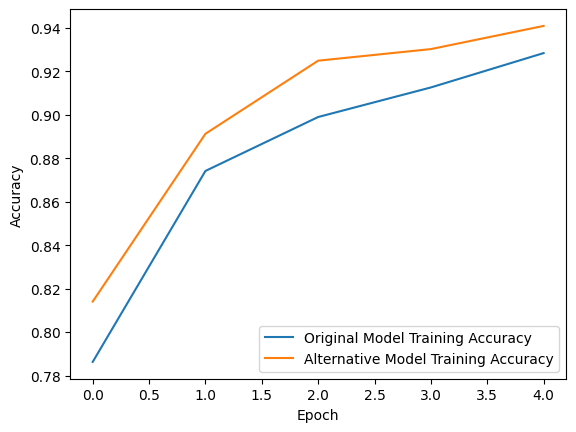

In [16]:
alternative_model = keras.Sequential()

alternative_model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
alternative_model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

alternative_model.add(keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu'))
alternative_model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

alternative_model.add(keras.layers.Flatten())

alternative_model.add(keras.layers.Dense(256, activation='relu'))
alternative_model.add(keras.layers.Dropout(0.5))

alternative_model.add(keras.layers.Dense(128, activation='relu'))
alternative_model.add(keras.layers.Dropout(0.5))

alternative_model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

alternative_model.compile(optimizer='adam',
                          loss='sparse_categorical_crossentropy',
                          metrics=['acc'])

alternative_history = alternative_model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

original_loss, original_accuracy = model.evaluate(X_test_scaled, Y_test)
print('Original Model - Test Accuracy:', original_accuracy)

alternative_loss, alternative_accuracy = alternative_model.evaluate(X_test_scaled, Y_test)
print('Alternative Model - Test Accuracy:', alternative_accuracy)

if alternative_accuracy > original_accuracy:
    print('The alternative model performs better.')
else:
    print('The original model performs better.')

plt.plot(history.history['acc'], label='Original Model Training Accuracy')
plt.plot(alternative_history.history['acc'], label='Alternative Model Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Path of the image to be predicted: /content/mask1.jpg


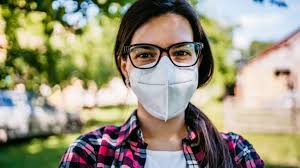

1/1 [==============================] - 0s 180ms/step
[[0.5870431  0.63602746]]
1
The person in the image is wearing a mask


In [15]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')